# Tanzania Water Wells 🚰 Prediction Model.
*By Muniu Paul ™️*

## 1. BUSINESS UNDERSTANDING.
### Overview.
Tanzania, a developing country with a population of 68.42 million as of January 2024, faces significant challenges in providing clean water to its people. According to a recent United Nations World Water Development Report, around 2 billion people globally lack access to clean and safe drinking water. In Tanzania, the crisis is even more acute: out of its 65 million people, 58 million (88% of the population) lack access to safe water. This severe shortage of clean water exacerbates health issues, economic hardships, and educational disparities across the country.

### Problem Statement.
The aim of this project is to predict the operational status of water wells in Tanzania using data on various features such as the type of pump, the year it was installed, and the management practices. Accurately predicting which water points are functional, which need repairs and which are non-functional will enable more effective maintenance operations and improve access to clean water for Tanzanian communities.

### Objectives.
1. Data Analysis and Preprocessing: Thoroughly analyze and clean the dataset to ensure it is suitable for modeling.
2. Model Development: Train and evaluate multiple classification models to identify the most accurate and precise model for predicting the status of water wells.
3. Model Evaluation: Use accuracy and precision as the primary metrics to evaluate the model's performance. These metrics will help determine how well the model identifies the status of water wells given various factors.
4. Deployment: Deploy the final model to our stakeholders, to aid in making data-driven decisions for maintaining and improving water access in Tanzania.

### Stakeholder: **WaterAid**
*Organization Overview.*

WaterAid is an international non-governmental organization (NGO) based in the United Kingdom. The organization is dedicated exclusively to ensuring equitable access to safe water, sanitation and hygiene education for the world’s poorest communities. WaterAid has a profound impact on improving health, education, and economic opportunities by providing sustainable solutions for water and sanitation.

*Project Mandate.*

WaterAid has tasked us with developing a predictive model to determine the operational status of water wells in Tanzania. This life-changing project aims to optimize the allocation of resources for maintenance and repair, ensuring that more people have access to clean and safe drinking water. By leveraging data-driven insights, WaterAid can enhance its mission of providing essential water services to underserved communities and contribute to global efforts in alleviating water and sanitation crises.

# 2. DATA UNDERSTANDING.
The dataset provided by [Taarifa](https://taarifa.org/) and the [Tanzanian Ministry of Water](https://www.maji.go.tz/) contains extensive information about various water points across Tanzania. Additionally, the features in this dataset are found [here.](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/)

##### Importing packages/libraries

In [122]:
import pandas as pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import missingno as msno
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


##### Loading the Dataset

In [123]:
import pandas as pd
data_values = pd.read_csv("Data/wells_data_values.csv")
data_values.info()

# function 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

The dataset consits of a total of 40 Columns and 59400 records. The features include:

`amount_tsh`: Total static head (amount of water available to the waterpoint)

`date_recorded`: The date the row was entered

`funder`: The entity that funded the well

`gps_height`: Altitude of the well

`installer`: Organization that installed the well

`longitude`: GPS coordinate

`latitude`: GPS coordinate

`wpt_name`: Name of the waterpoint, if there is one

`num_private`: Not specified (likely an identifier for private records)

`basin`: Geographic water basin

`subvillage`: Geographic location

`region`: Geographic location

`region_code`: Geographic location (coded)

`district_code`: Geographic location (coded)

`lga`: Local Government Area

`ward`: Geographic location

`population`: Population around the well

`public_meeting`: Boolean indicating if a public meeting was held

`recorded_by`: Group entering this row of data

`scheme_management`: Entity responsible for managing the water scheme

`scheme_name`: Name of the water scheme

`permit`: Boolean indicating if the waterpoint is permitted

`construction_year`: Year the waterpoint was constructed

`extraction_type`: Type of extraction used by the waterpoint

`extraction_type_group`: Group classification of extraction type

`extraction_type_class`: Class classification of extraction type

`management`: How the waterpoint is managed

`management_group`: Group classification of management type

`payment`: Type of payment for water

`payment_type`: Group classification of payment type

`water_quality`: Quality of the water

`quality_group`: Group classification of water quality

`quantity`: Quantity of water

`quantity_group`: Group classification of water quantity

`source`: Source of the water

`source_type`: Group classification of water source

`source_class`: Class classification of water source

`waterpoint_type`: Type of waterpoint

`waterpoint_type_group`: Group classification of waterpoint type



In [124]:
data_labels = pd.read_csv("Data/wells_labels.csv")
data_labels.info()
print("--------------------------------------------")
for index, status_group  in enumerate(data_labels["status_group"].unique() , start=1):
    print(f"{index}.{status_group.upper()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.3+ KB
--------------------------------------------
1.FUNCTIONAL
2.NON FUNCTIONAL
3.FUNCTIONAL NEEDS REPAIR


Target Variable
The target variable is the operational status "`status_group`" of the water point, which has three possible values:

1. `Functional`: The waterpoint is operational, and no repairs are needed.
2. `Non functional`: The waterpoint is not operational.
3. `Functional needs repair`: The waterpoint is operational but requires repairs.


# 3. DATA PREPARATION.
#### (a) Merging.
We will kick-off by merging the two datasets.

In [125]:
# estatic to see both datasets have the same number of rows!
data_labels.shape, data_values.shape

((59400, 2), (59400, 40))

In [126]:
# merging the predictors and the target
wells_data = pd.merge(data_values, data_labels, on = "id", how="outer" )
print(wells_data.shape)
wells_data.sample(3)

(59400, 41)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
40023,10213,0.0,2011-08-08,Swedish,0,Sengerema Water Department,32.183656,-2.407555,Buhindini Forest,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
18682,19730,0.0,2012-10-22,Government Of Tanzania,1523,Government,33.988200,-1.720046,Mahakamani,0,...,soft,good,enough,enough,lake,river/lake,surface,communal standpipe multiple,communal standpipe,non functional
44199,69361,50.0,2013-03-19,0,56,0,39.118177,-6.892027,Kwa Mzee Huruju,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional


#### (b)Feature Dropping.

I eliminated features that were redundant or unusable for our models. Many features contained similar information, and some, such as `num_private`, lacked sufficient descriptions for meaningful use. This trimming process helps streamline our dataset and improve model performance.


In [127]:
columns_to_delete = ['num_private', 'wpt_name', 'recorded_by', 'scheme_name', 'public_meeting', 'payment',
                     'extraction_type_group', 'extraction_type_class', 'management', 'water_quality',
                     'lga', 'ward', 'region_code', 'district_code', 'subvillage', "scheme_name", "scheme_management",
                     "public_meeting",'source', 'source_class', 'longitude', 'latitude', 'quantity_group', 'waterpoint_type']

# Print the columns to delete
wells_data[columns_to_delete].sample(2)

,num_private,wpt_name,recorded_by,scheme_name,public_meeting,payment,extraction_type_group,extraction_type_class,management,water_quality,...,subvillage,scheme_name,scheme_management,public_meeting,source,source_class,longitude,latitude,quantity_group,waterpoint_type
31314,0,Ilumbila,GeoData Consultants Ltd,NaN,False,pay when scheme fails,nira/tanira,handpump,vwc,soft,...,Sanya,NaN,VWC,False,shallow well,groundwater,33.167275,-9.040657,seasonal,hand pump
29271,0,Kwabita,GeoData Consultants Ltd,NaN,True,never pay,india mark ii,handpump,vwc,salty,...,Rwakibugu,NaN,NaN,True,shallow well,groundwater,30.965754,-1.745585,enough,hand pump


In [128]:
wells_data = wells_data.drop(columns = columns_to_delete)
print(wells_data.shape)
wells_data.sample(2)

(59400, 19)


,id,amount_tsh,date_recorded,funder,gps_height,installer,basin,region,population,permit,construction_year,extraction_type,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type_group,status_group
54930,73196,0.0,2011-07-10,Msikiti,0,Msikiti,Lake Victoria,Kagera,0,True,0,swn 80,commercial,never pay,good,enough,shallow well,hand pump,functional
38289,29481,0.0,2011-04-09,World Bank,0,SAXON,Wami / Ruvu,Dodoma,0,True,0,gravity,user-group,per bucket,good,enough,spring,cattle trough,functional


In [129]:
# Checking for duplicates
wells_data.duplicated().sum()

0

##### Handling Missing Values


In [130]:
#function for identifying with missing values
def missing_values(data):
    """
    Identify the missing values and their percentages
    Drop values that have no missing values
    Return only data with missing values
    """
    miss_val = data.isna().sum().sort_values(ascending = False)
    percentage = (data.isna().sum() / len(data)).sort_values(ascending = False)
    missing_values = pd.DataFrame({"Missing Values": miss_val, "In Percentage": (percentage)*100})
    missing_values.drop(missing_values[missing_values["In Percentage"] == 0].index, inplace=True)
    return missing_values

missing_values(wells_data)

,Missing Values,In Percentage
installer,3655,6.153199
funder,3637,6.122896
permit,3056,5.144781




I observed that certain columns in our dataset had a small percentage of missing values. 
Given that the percentage of missing values in these columns is relatively low, I decided to drop the rows containing missing values in these columns. This approach ensures that we do not risk introducing any bias or inaccuracies that could result from improper imputation


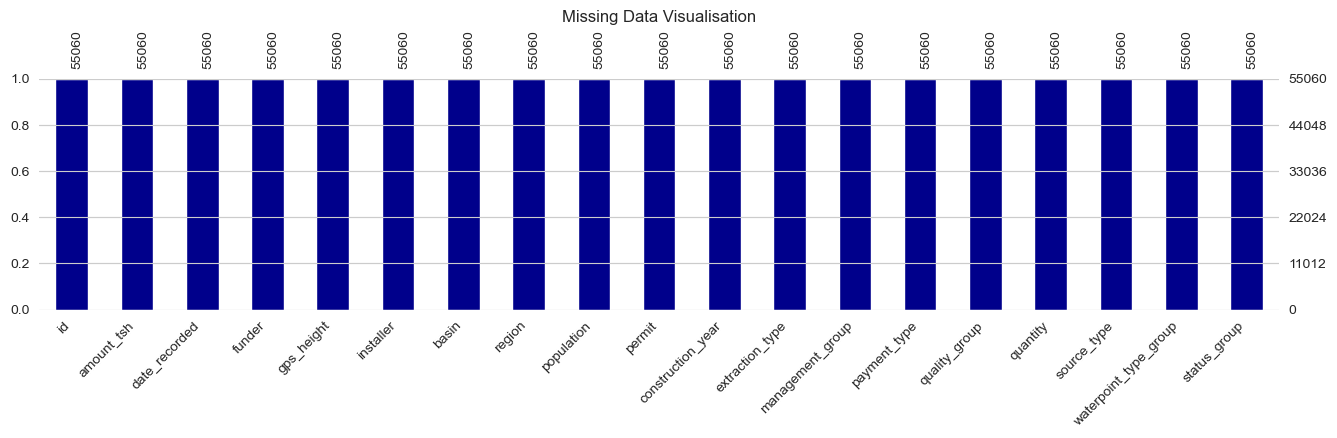

In [131]:
# Dropping rows with missing values in the specified columns
wells_data = wells_data.dropna(subset=['installer', 'funder', 'permit'])

# Visualise to verify any missing data in the DataFrame
msno.bar(wells_data, figsize=(16, 3), fontsize=(10), color='darkblue')
plt.title("Missing Data Visualisation")
plt.xticks(rotation = 90, fontsize=10);

In [132]:
wells_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55060 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     55060 non-null  int64  
 1   amount_tsh             55060 non-null  float64
 2   date_recorded          55060 non-null  object 
 3   funder                 55060 non-null  object 
 4   gps_height             55060 non-null  int64  
 5   installer              55060 non-null  object 
 6   basin                  55060 non-null  object 
 7   region                 55060 non-null  object 
 8   population             55060 non-null  int64  
 9   permit                 55060 non-null  object 
 10  construction_year      55060 non-null  int64  
 11  extraction_type        55060 non-null  object 
 12  management_group       55060 non-null  object 
 13  payment_type           55060 non-null  object 
 14  quality_group          55060 non-null  object 
 15  quantit


#### Feature Engineering: `Age of Waterpoint.`

To enhance the dataset, we created a new feature called `age_of_waterpoint`. This feature represents the age of the waterpoint at the time the data was recorded. It is calculated by subtracting the `construction_year` from the year extracted from the `date_recorded`.
During our data analysis, we found that the `construction_year` column contains many zero values, which are unrealistic and likely indicate missing data. To address this, we replaced the zero values with the median of the non-zero construction years. The median is chosen because it is robust to outliers and represents a typical value in the dataset.



In [133]:
# Convert 'date_recorded' to datetime data type
wells_data['date_recorded'] = pd.to_datetime(wells_data['date_recorded'])

# view column "construction_year"
wells_data["construction_year"].unique()


array([1999, 2010, 2009, 1986,    0, 2011, 1987, 1991, 1978, 1992, 2008,
       1974, 2000, 2002, 2004, 1972, 2003, 2007, 1973, 1985, 1995, 2006,
       1962, 2005, 1997, 1970, 1996, 1977, 1983, 2012, 1984, 1982, 1976,
       1988, 1989, 1975, 1960, 1990, 1961, 1998, 1963, 1971, 1994, 1968,
       1980, 1993, 2001, 1979, 1967, 1969, 1981, 2013, 1964, 1966, 1965],
      dtype=int64)

In [134]:
# Calculate the median of non-zero construction years
median_construction_year = wells_data[wells_data['construction_year'] != 0]['construction_year'].median()

# Replace zero values with the median
wells_data['construction_year'] = wells_data['construction_year'].replace(0, median_construction_year)

# Calculate age of waterpoint
wells_data['age_of_waterpoint'] = wells_data['date_recorded'].dt.year - wells_data['construction_year']

# Check the new feature
wells_data[['date_recorded', 'construction_year', 'age_of_waterpoint']].sample(2)

,date_recorded,construction_year,age_of_waterpoint
7926,2011-07-23,2000,11
26490,2011-08-02,2000,11


#### Binary classification.
To simplify the classification task and focus on distinguishing between functional and non-functional waterpoints, we created a new binary target with two categories:
1. Functional: This class includes waterpoints that are operational and do not require any repairs.
2. Non-Functional: This class includes waterpoints that are either not operational or require repairs.
By converting the target variable to binary form, we aim to streamline the classification process and prioritize the identification of non-functional waterpoints for intervention and maintenance efforts. 


In [135]:
# Replace 'status_group' with binary labels
wells_data['status_group'] = wells_data['status_group'].replace({'functional': 'Functional', 
                                                           'non functional': 'Non-Functional', 
                                                           'functional needs repair': 'Non-Functional'})
wells_data[['status_group']].sample(3, random_state=42)

,status_group
15528,Non-Functional
2935,Functional
18617,Non-Functional


In [136]:
# Function that Separates categorical columns from numerical columns.
 

def separate_columns(df):
   
    # Identify categorical and numerical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    numerical_cols = df.select_dtypes(include=['number']).columns
    
    return numerical_cols, categorical_cols

numerical_cols, categorical_cols = separate_columns(wells_data)
print("Numerical Columns:")
print(numerical_cols)
print("\nCategorical Columns:")
print(categorical_cols)


Numerical Columns:
Index(['id', 'amount_tsh', 'gps_height', 'population', 'construction_year',
       'age_of_waterpoint'],
      dtype='object')

Categorical Columns:
Index(['funder', 'installer', 'basin', 'region', 'permit', 'extraction_type',
       'management_group', 'payment_type', 'quality_group', 'quantity',
       'source_type', 'waterpoint_type_group', 'status_group'],
      dtype='object')


##### Check for outliers in our dataset.

In [137]:
# outlier function.
# Function to plot boxplot
def box_plot(data, column, hue=None):
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=column, data=data, hue=hue)
    plt.title(f"{column} outliers")
    plt.show()

# Helper function to remove outliers from a specified column using the IQR method.
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df


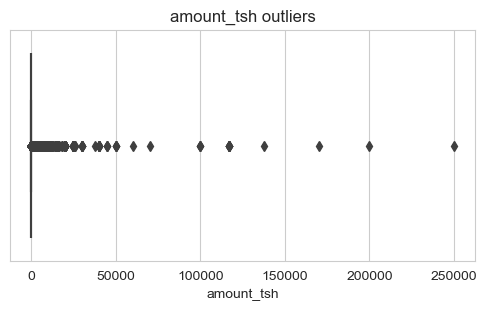

326.8382101343989


In [148]:
box_plot(wells_data,'amount_tsh')
print(wells_data["amount_tsh"].mean())

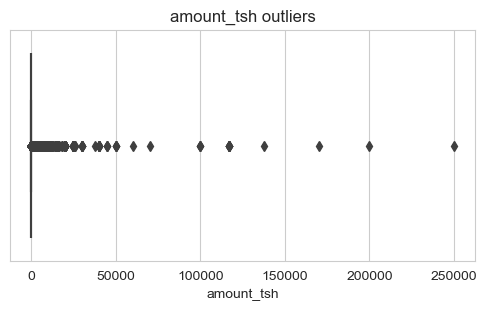

326.8382101343989


In [149]:
remove_outliers(wells_data, "amount_tsh")
box_plot(wells_data,'amount_tsh')
print(wells_data["amount_tsh"].mean())

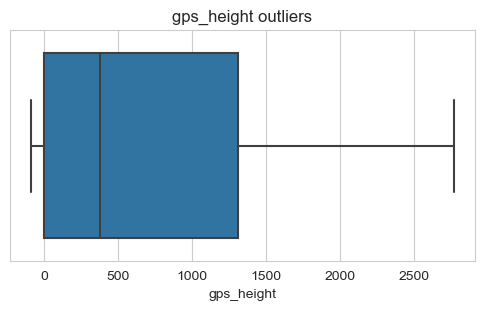

670.2096985107156


In [146]:
box_plot(wells_data,'gps_height')
print(wells_data["gps_height"].mean())

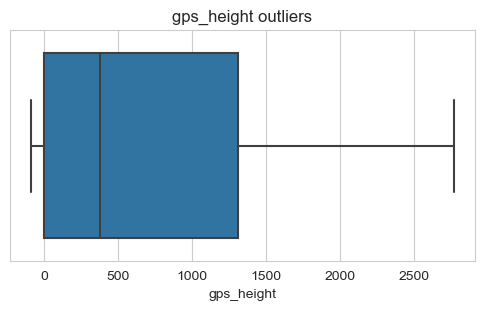

670.2096985107156


In [147]:
remove_outliers(wells_data, "gps_height")
box_plot(wells_data,'gps_height')
print(wells_data["gps_height"].mean())

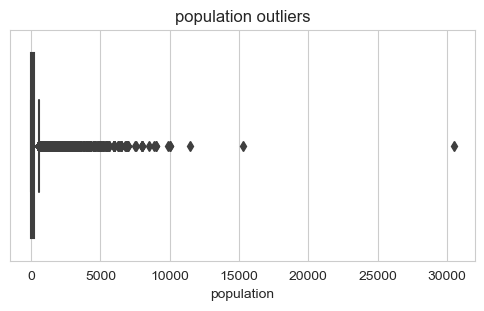

182.76195059934616


In [142]:
box_plot(wells_data,'population')
print(wells_data["population"].mean())

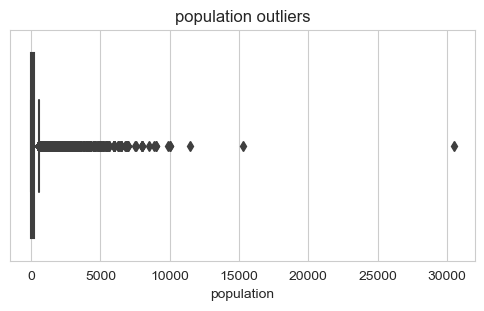

182.76195059934616


In [143]:
remove_outliers(wells_data, "population")
box_plot(wells_data,'population')
print(wells_data["population"].mean())

Data Distribution: The majority of the data might still fall within the IQR bounds, leaving extreme values that still appear as outliers.